In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('film_indonesia_2023.csv')

In [3]:
df.head()

,Judul,Sutradara,Genre,Produksi,Distributor,Penonton,Klasifikasi usia,Date,Rating
0,Alena Anak Ratu Iblis,Sonu Samtani,Horor,Arjuna Mega Films,Bioskop,86769.0,13+,2023-01-05,3.2
1,Puisi Cinta yang Membunuh,Garin Nugroho,Horor,Starvision Plus,Bioskop,52086.0,17+,2023-01-05,4.9
2,Hidayah,Monty Tiwa,Horor,Pichouse Films,Bioskop,333982.0,13+,2023-01-12,5.5
3,Anak Titipan Setan,Erwin Arnada,Horor,Produksi Film Negara,Bioskop,84166.0,17+,2023-01-12,5.2
4,The Day Before the Wedding,Razka Robby Ertanto,Drama,KlikFilm Productions,KlikFilm,NaN,17+,2023-01-13,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Judul             126 non-null    object 
 1   Sutradara         126 non-null    object 
 2   Genre             126 non-null    object 
 3   Produksi          126 non-null    object 
 4   Distributor       126 non-null    object 
 5   Penonton          106 non-null    float64
 6   Klasifikasi usia  116 non-null    object 
 7   Date              126 non-null    object 
 8   Rating            105 non-null    float64
dtypes: float64(2), object(7)
memory usage: 9.0+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Penonton'].fillna(df['Penonton'].mean(), inplace = True)
df['Klasifikasi usia'].fillna(df['Klasifikasi usia'].mode()[0], inplace = True)

In [7]:
df['Penonton'] = df['Penonton'].astype('int')

In [8]:
df['Bulan'] = df['Date'].dt.month

In [9]:
df.describe()

,Penonton,Date,Rating,Bulan
count,1.260000e+02,126,105.000000,126.000000
mean,4.869281e+05,2023-06-24 03:48:34.285714176,6.744762,6.253968
min,3.460000e+02,2023-01-05 00:00:00,2.300000,1.000000
25%,5.513300e+04,2023-03-16 00:00:00,5.700000,3.000000
50%,2.630400e+05,2023-06-25 00:00:00,6.800000,6.000000
75%,4.869280e+05,2023-09-26 12:00:00,7.700000,9.000000
max,4.886406e+06,2023-12-28 00:00:00,9.600000,12.000000
std,7.490859e+05,NaN,1.577424,3.512120


In [10]:
df.describe(include='all')

,Judul,Sutradara,Genre,Produksi,Distributor,Penonton,Klasifikasi usia,Date,Rating,Bulan
count,126,126,126,126,126,1.260000e+02,126,126,105.000000,126.000000
unique,126,93,7,78,6,NaN,5,NaN,NaN,NaN
top,Alena Anak Ratu Iblis,Anggy Umbara,Drama,MD Pictures,Bioskop,NaN,13+,NaN,NaN,NaN
freq,1,5,59,11,107,NaN,74,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.869281e+05,NaN,2023-06-24 03:48:34.285714176,6.744762,6.253968
min,NaN,NaN,NaN,NaN,NaN,3.460000e+02,NaN,2023-01-05 00:00:00,2.300000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,5.513300e+04,NaN,2023-03-16 00:00:00,5.700000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,2.630400e+05,NaN,2023-06-25 00:00:00,6.800000,6.000000
75%,NaN,NaN,NaN,NaN,NaN,4.869280e+05,NaN,2023-09-26 12:00:00,7.700000,9.000000
max,NaN,NaN,NaN,NaN,NaN,4.886406e+06,NaN,2023-12-28 00:00:00,9.600000,12.000000


In [12]:
def ylabel(x, pos):
    return f'{x*1e-6:1.1f} Juta'

In [29]:
numerical_features = ['Penonton', 'Rating']

<Figure size 2000x1500 with 0 Axes>

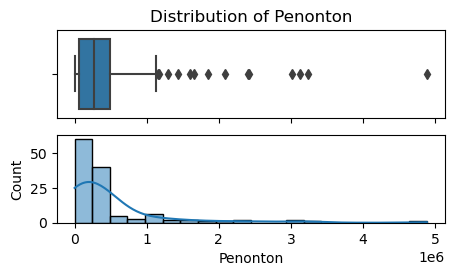

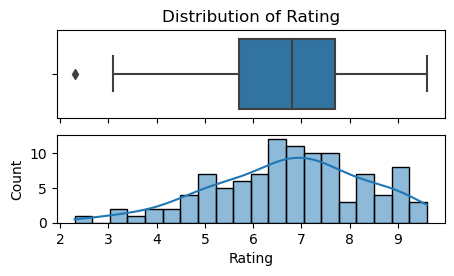

In [32]:
plt.figure(figsize=(20,15))

for i in numerical_features:
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (5,2.5))
    ax1.set_title(f"Distribution of {i}", color = "black")
    sns.boxplot(x = df[i], ax = ax1)
    ax1.set_xlabel ("")
    sns.histplot(data = df, x=i, ax = ax2, stat = "count", kde=True, bins=20)
    plt.show()

Text(0.5, 1.0, 'Korelasi Antara Setiap Variabel Numerik')

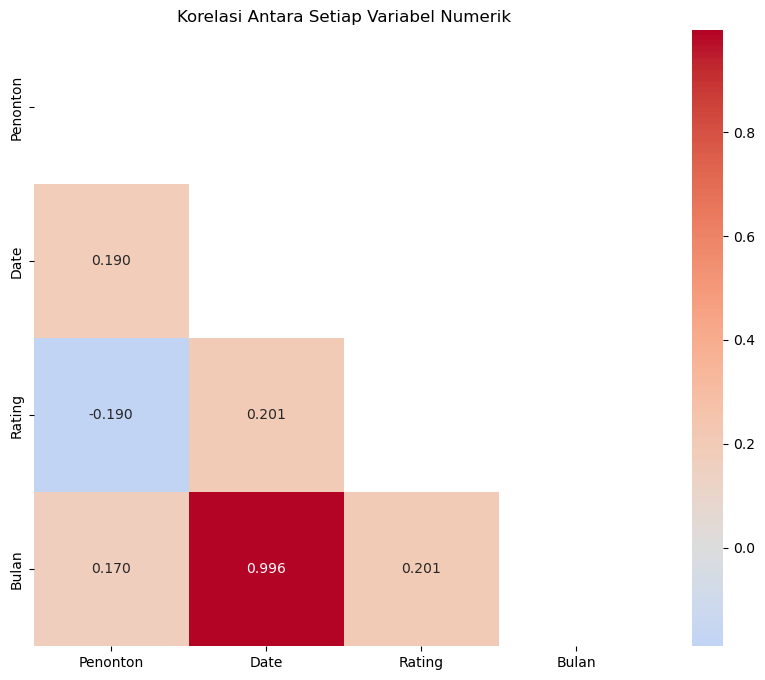

In [11]:
numerical_features = df.describe().columns
plt.figure(figsize=(10,8))

mask = np.triu(df[numerical_features].corr(method='spearman'))

sns.heatmap(data=df[numerical_features].corr(method='spearman'), annot=True, fmt='.3f', cmap='coolwarm', center=0, mask=mask)
plt.title('Korelasi Antara Setiap Variabel Numerik')

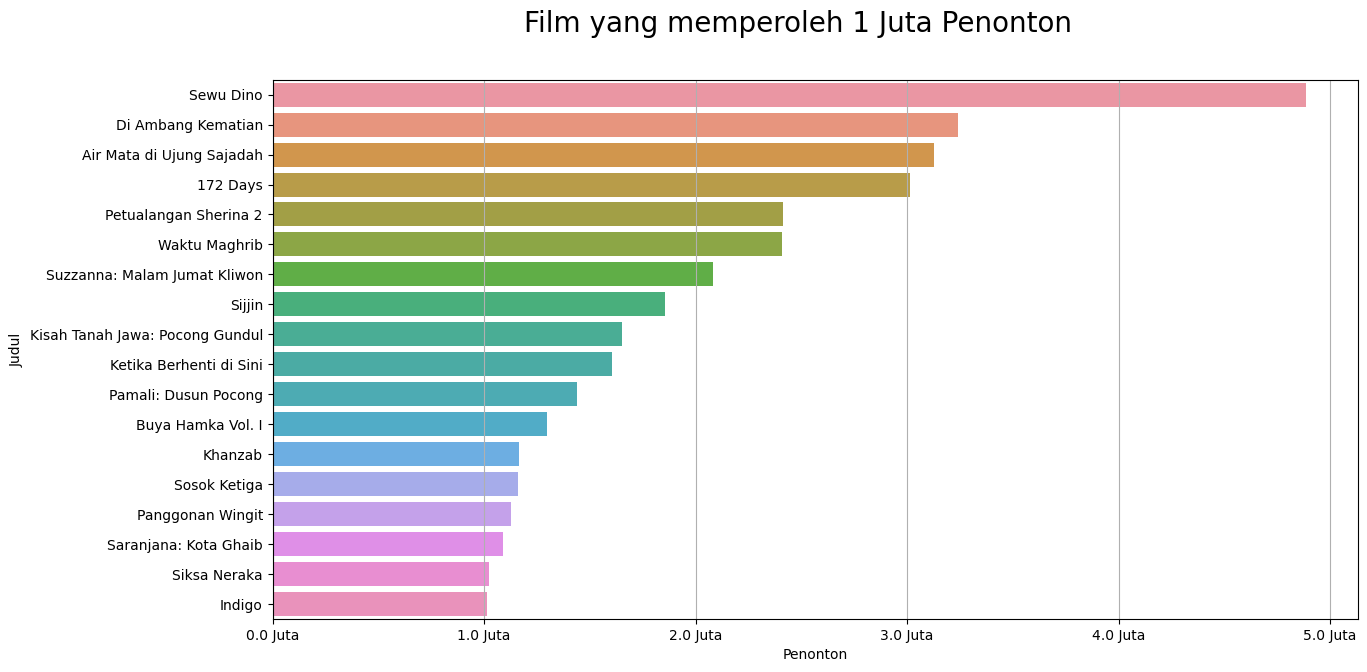

In [13]:
fig, ax = plt.subplots(figsize=(14,7))

d1 = df[df['Penonton']>1000000].sort_values(by='Penonton', ascending=False)

ax = sns.barplot(d1, x='Penonton', y='Judul')
ax.grid(True, axis='x')
plt.suptitle('Film yang memperoleh 1 Juta Penonton', fontsize=20)

ax.xaxis.set_major_formatter(ylabel)
plt.show()

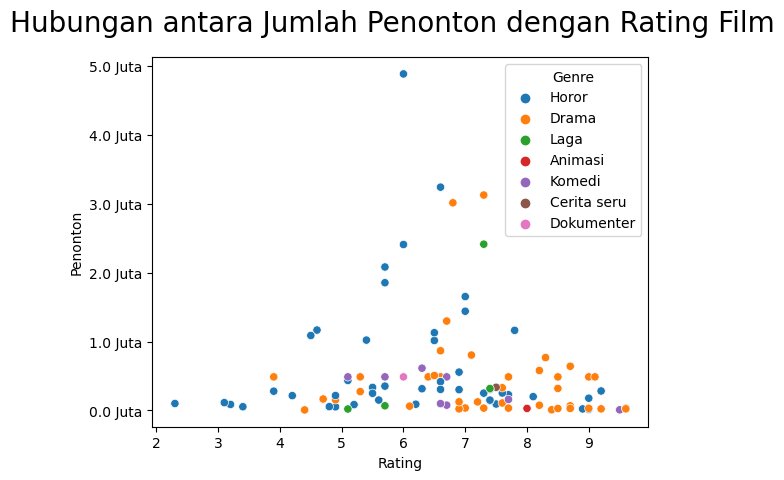

In [14]:
fig, ax = plt.subplots()

plt.suptitle('Hubungan antara Jumlah Penonton dengan Rating Film', fontsize=20)
ax = sns.scatterplot(df, x='Rating', y='Penonton', hue='Genre')
ax.yaxis.set_major_formatter(ylabel)
plt.show()

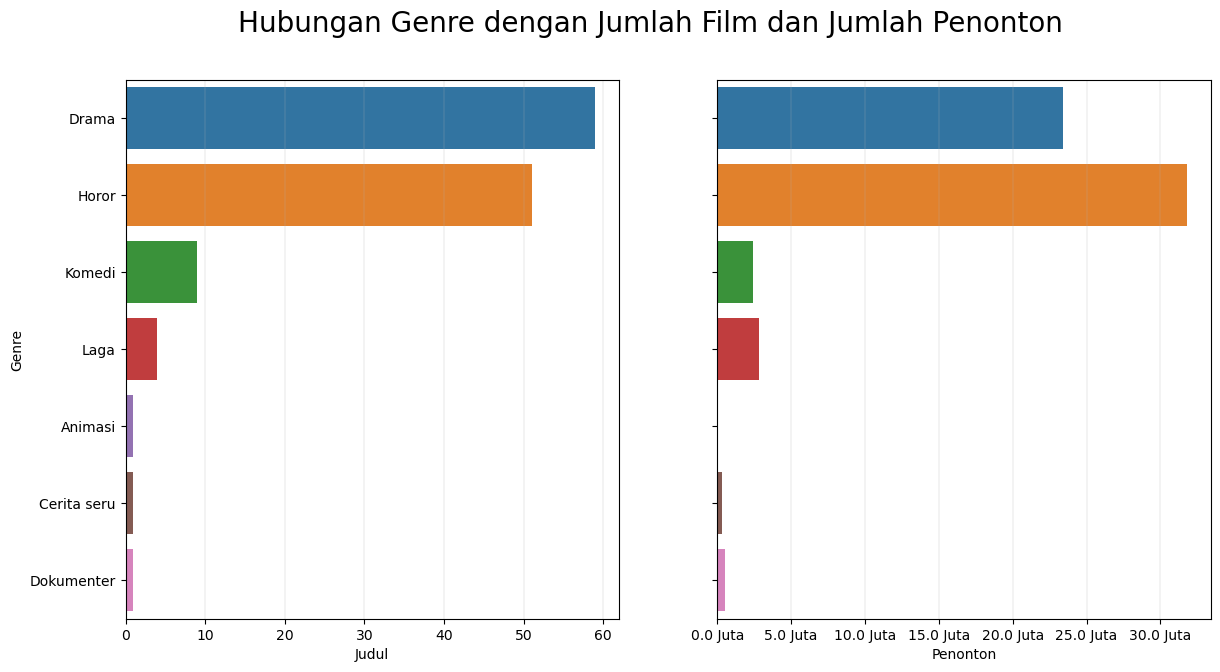

In [15]:
fig, (ax1,ax2) = plt.subplots(nrows= 1, ncols= 2, figsize=(14,7), sharey=True)

d2 = df.groupby(['Genre'], as_index=False).agg({
    'Penonton': 'sum',
    'Rating': 'mean',
    'Judul': 'count' 
}).sort_values(by='Judul', ascending=False)

plt.suptitle('Hubungan Genre dengan Jumlah Film dan Jumlah Penonton', fontsize=20)
ax1 = sns.barplot(d2, x='Judul', y='Genre', ax=ax1)
ax1.grid(True, axis='x', linewidth=0.2)

ax2 = sns.barplot(d2, x='Penonton', y='Genre', ax=ax2)
ax2.xaxis.set_major_formatter(ylabel)
ax2.grid(True, axis='x', linewidth=0.2)
ax2.set_ylabel(None)

plt.show()

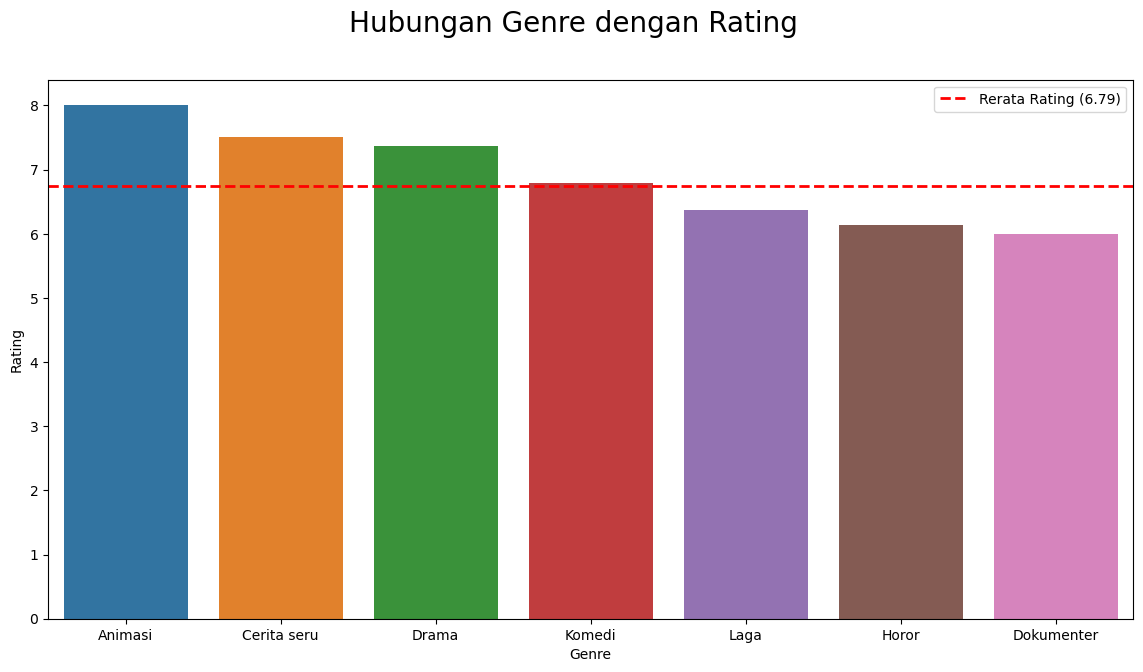

In [16]:
fig, ax = plt.subplots(figsize=(14,7))

ax = sns.barplot(d2.sort_values(by='Rating', ascending=False), x='Genre', y='Rating')
plt.suptitle('Hubungan Genre dengan Rating', fontsize=20)

ax.axhline(y=df['Rating'].mean(), color='red', linestyle='--', linewidth=2, label='Rerata Rating (6.79)')
ax.legend()
plt.show()

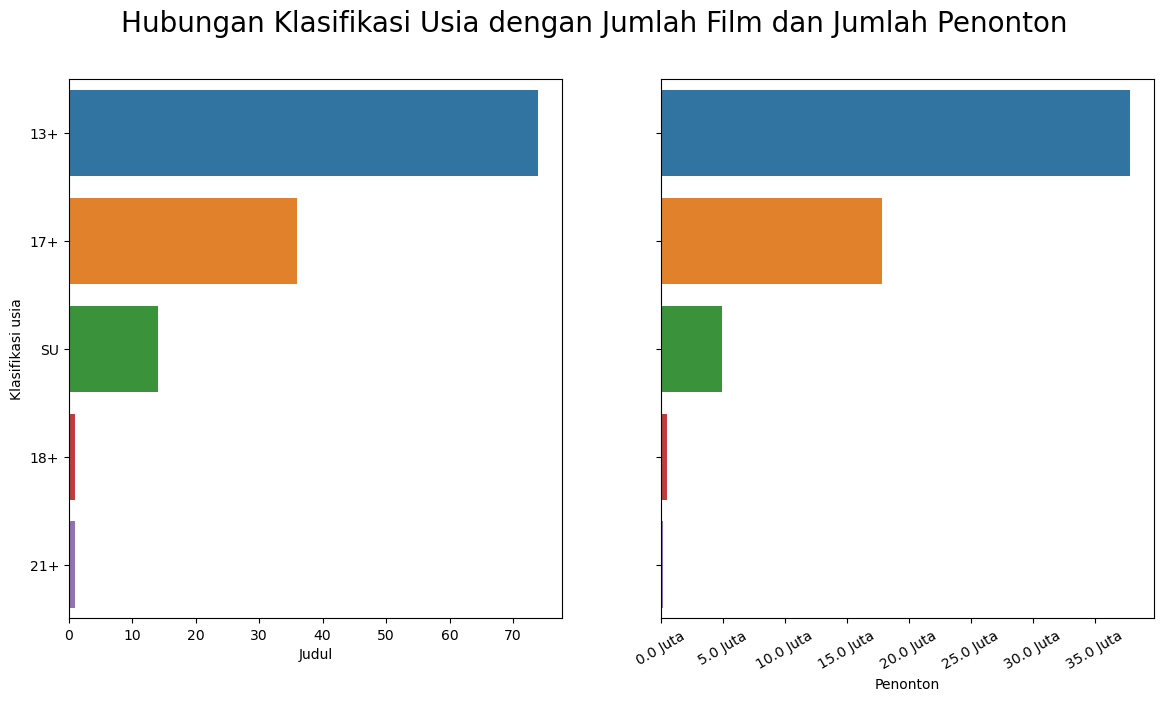

In [17]:
fig, (ax1,ax2) = plt.subplots(nrows= 1, ncols= 2, figsize=(14,7), sharey=True)

d3 = df.groupby(['Klasifikasi usia'], as_index=False).agg({
    'Penonton': 'sum',
    'Rating': 'mean',
    'Judul': 'count' 
}).sort_values(by='Judul', ascending=False)

plt.suptitle('Hubungan Klasifikasi Usia dengan Jumlah Film dan Jumlah Penonton', fontsize=20)
ax1 = sns.barplot(d3, x='Judul', y='Klasifikasi usia', ax=ax1)

ax2 = sns.barplot(d3, x='Penonton', y='Klasifikasi usia', ax=ax2)
ax2.xaxis.set_major_formatter(ylabel)
ax2.set_ylabel(None)
ax2.tick_params(axis='x',rotation=30)

plt.show()

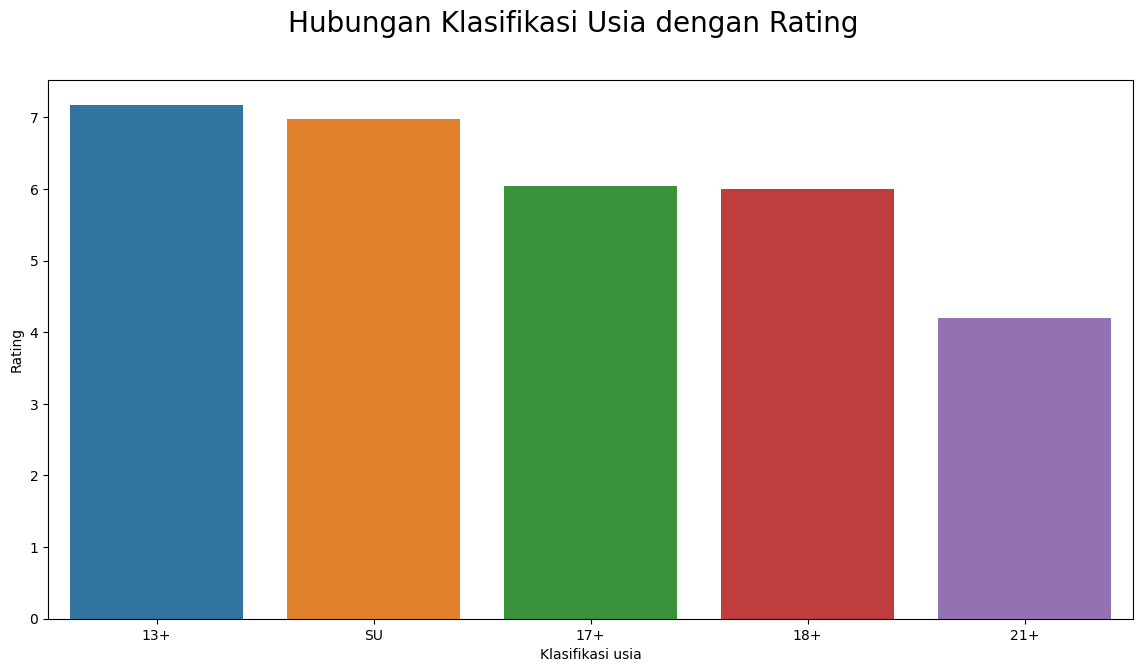

In [18]:
fig, ax = plt.subplots(figsize=(14,7))

ax = sns.barplot(d3.sort_values(by='Rating', ascending=False), x='Klasifikasi usia', y='Rating')
plt.suptitle('Hubungan Klasifikasi Usia dengan Rating', fontsize=20)

plt.show()

Text(0.5, 1.0, 'Perbandingan Jumlah Film antara Genre dan Klasifikasi Usia')

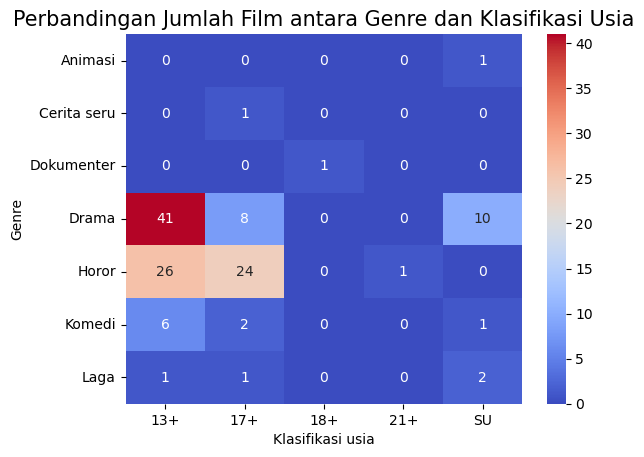

In [19]:
d7 = pd.crosstab(df['Genre'], df['Klasifikasi usia'])

sns.heatmap(d7,annot=True,  cmap='coolwarm')
plt.title('Perbandingan Jumlah Film antara Genre dan Klasifikasi Usia', fontsize=15)
# sns.countplot(df, x='Genre', hue='Klasifikasi usia')

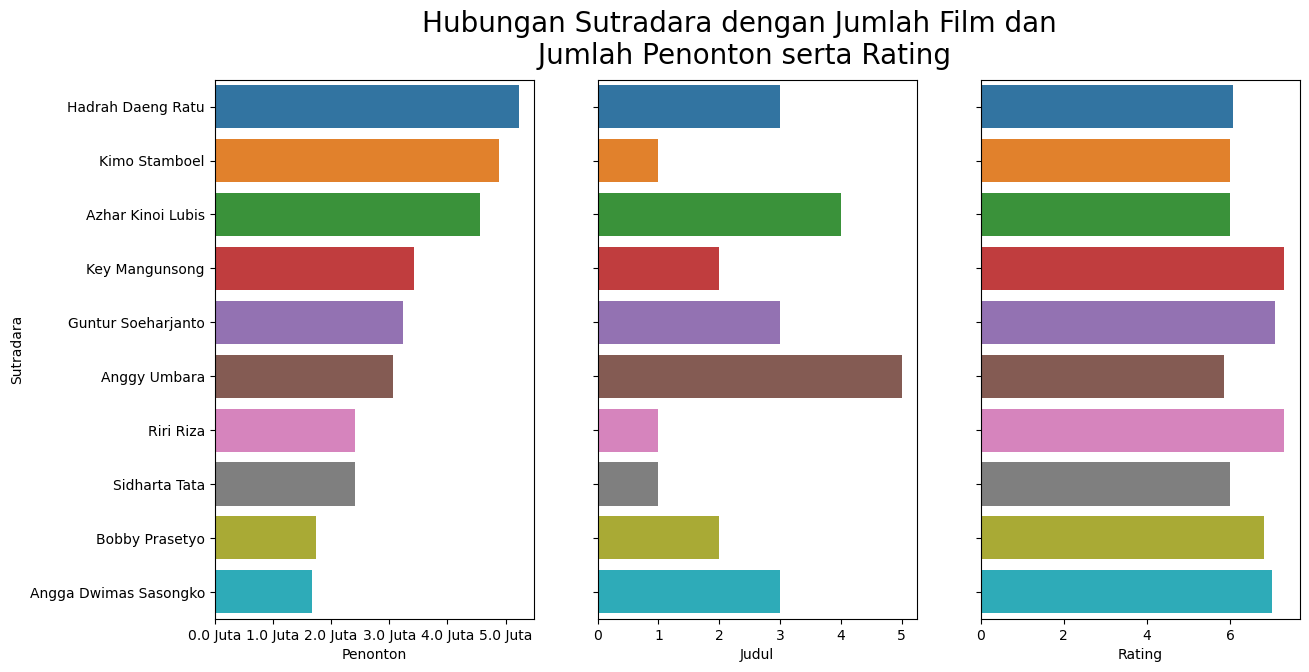

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots( nrows= 1, ncols= 3, figsize=(14,7), sharey=True)

d4 = df.groupby(['Sutradara'], as_index=False).agg({
    'Penonton': 'sum',
    'Rating': 'mean',
    'Judul': 'count' 
}).sort_values(by='Penonton', ascending=False)

plt.suptitle('Hubungan Sutradara dengan Jumlah Film dan\n Jumlah Penonton serta Rating', fontsize=20)

ax1 = sns.barplot(d4.head(10), x='Penonton', y='Sutradara', ax=ax1)
ax2 = sns.barplot(d4.head(10), x='Judul', y='Sutradara', ax=ax2)
ax3 = sns.barplot(d4.head(10), x='Rating', y='Sutradara', ax=ax3)

ax1.xaxis.set_major_formatter(ylabel)

for ax in ax2, ax3:
    ax.set_ylabel(None)

plt.show()

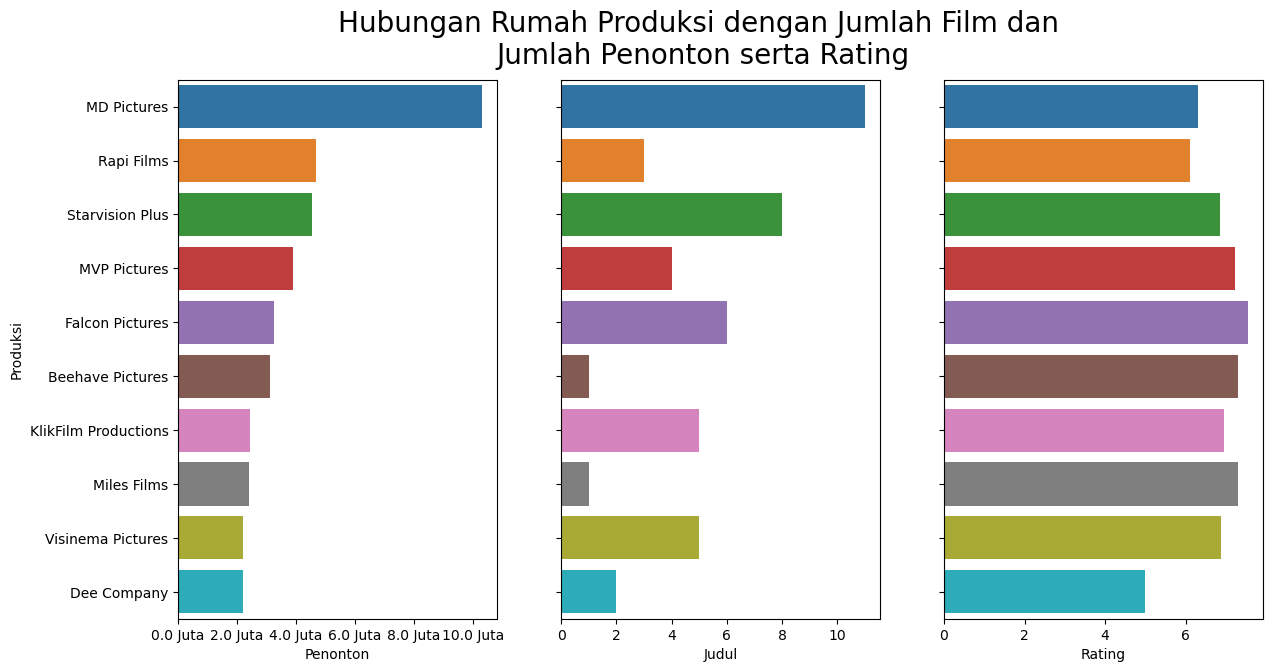

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots( nrows= 1, ncols= 3, figsize=(14,7), sharey=True)

d5 = df.groupby(['Produksi'], as_index=False).agg({
    'Penonton': 'sum',
    'Rating': 'mean',
    'Judul': 'count' 
}).sort_values(by='Penonton', ascending=False)

plt.suptitle('Hubungan Rumah Produksi dengan Jumlah Film dan \nJumlah Penonton serta Rating', fontsize=20)

ax1 = sns.barplot(d5.head(10), x='Penonton', y='Produksi', ax=ax1)
ax2 = sns.barplot(d5.head(10), x='Judul', y='Produksi', ax=ax2)
ax3 = sns.barplot(d5.head(10), x='Rating', y='Produksi', ax=ax3)

ax1.xaxis.set_major_formatter(ylabel)

for ax in ax2, ax3:
    ax.set_ylabel(None)

plt.show()

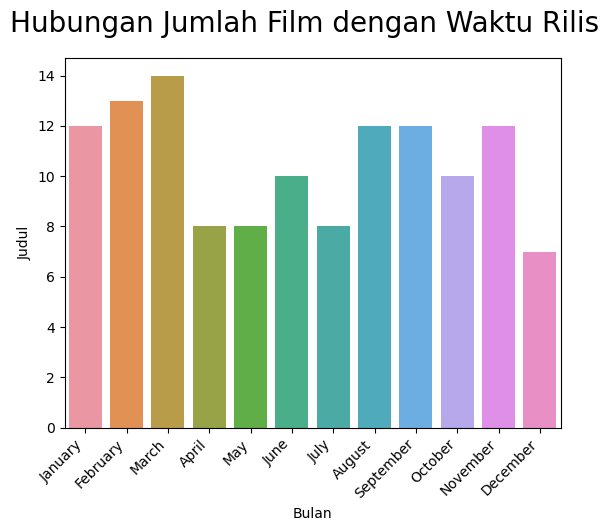

In [22]:
import calendar
fig, ax = plt.subplots()

d6 = df.groupby(['Bulan'], as_index=False)['Judul'].count()
plt.suptitle('Hubungan Jumlah Film dengan Waktu Rilis', fontsize=20)


urutan_bulan = list(calendar.month_name)[1:]
ax = sns.barplot(d6, x='Bulan', y='Judul')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(urutan_bulan, rotation=45, ha='right')

plt.show()

Text(0.5, 1.0, 'Jumlah Film Berdasarkan Tempat Rilis \n(Selain Bioskop)')

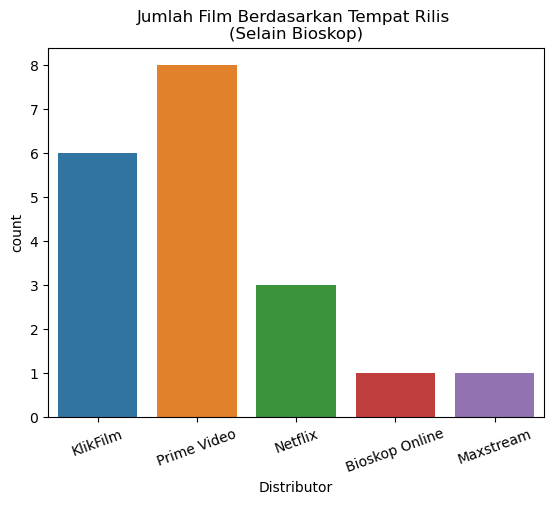

In [23]:
ax = sns.countplot(df[df['Distributor'] != 'Bioskop'], x='Distributor')
ax.tick_params(rotation=20, axis='x')
ax.set_title('Jumlah Film Berdasarkan Tempat Rilis \n(Selain Bioskop)')